In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
#print(df['Temp'][:31].values)

[20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20.  16.2 13.3 16.7 21.5
 25.  20.7 20.6 24.8 17.7 15.5 18.2 12.1 14.4 16.  16.5 18.7 19.4 17.2
 15.5 15.1 15.4]


In [4]:
time_steps = df.index.values
series = df['Temp'].values

In [5]:
print(len(time_steps))

3650


In [6]:
split_time = int(len(time_steps) * 0.7)
print(split_time)

train_series = series[:split_time]
train_time = time_steps[:split_time]

val_series = series[split_time:]
val_time = time_steps[split_time:]

2555


In [7]:
from tensorflow.keras.utils import timeseries_dataset_from_array

batch_size = 32
window_size = 30

train_data = timeseries_dataset_from_array(data=train_series[:-window_size],
                                           targets=train_series[window_size:],
                                           sequence_length=window_size,
                                           batch_size=batch_size,
                                           shuffle=False)

val_data = timeseries_dataset_from_array(data=val_series[:-window_size],
                                         targets=val_series[window_size:],
                                         sequence_length=window_size,
                                         batch_size=batch_size,
                                         shuffle=False)

In [59]:
# view first batch of window/target pairs from tensor dataset

#for window, target in train_data:
#  print(window)
#  print(target)
#  break

In [19]:
model = tf.keras.models.Sequential([
                tf.keras.layers.LSTM(64, input_shape=(window_size, 1), return_sequences=True),
                tf.keras.layers.LSTM(64),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(32, activation='relu'),
                tf.keras.layers.Dense(1, activation='relu')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 56,193
Trainable params: 56,193
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [22]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [23]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=30,
                    callbacks=lr_schedule)

Epoch 1/30
78/78 [==============================] - 8s 41ms/step - loss: 6.1037 - mae: 1.9303 - val_loss: 5.3698 - val_mae: 1.8338 - lr: 1.0000e-08
Epoch 2/30
78/78 [==============================] - 2s 29ms/step - loss: 6.1036 - mae: 1.9303 - val_loss: 5.3696 - val_mae: 1.8337 - lr: 1.1220e-08
Epoch 3/30
78/78 [==============================] - 2s 29ms/step - loss: 6.1034 - mae: 1.9303 - val_loss: 5.3694 - val_mae: 1.8337 - lr: 1.2589e-08
Epoch 4/30
78/78 [==============================] - 2s 29ms/step - loss: 6.1032 - mae: 1.9302 - val_loss: 5.3691 - val_mae: 1.8336 - lr: 1.4125e-08
Epoch 5/30
78/78 [==============================] - 2s 30ms/step - loss: 6.1029 - mae: 1.9302 - val_loss: 5.3688 - val_mae: 1.8336 - lr: 1.5849e-08
Epoch 6/30
78/78 [==============================] - 2s 29ms/step - loss: 6.1026 - mae: 1.9301 - val_loss: 5.3684 - val_mae: 1.8335 - lr: 1.7783e-08
Epoch 7/30
78/78 [==============================] - 2s 29ms/step - loss: 6.1023 - mae: 1.9301 - val_loss: 5.3679

In [26]:
lr = history.history['lr'][-1]

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='mse',
              metrics=['mae'])

history2 = model.fit(train_data,
                    validation_data=val_data,
                    epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


78/78 [==============================] - 11s 57ms/step - loss: 6.0570 - mae: 1.9215 - val_loss: 5.3082 - val_mae: 1.8208
Epoch 2/30
78/78 [==============================] - 3s 35ms/step - loss: 6.0538 - mae: 1.9209 - val_loss: 5.3040 - val_mae: 1.8199
Epoch 3/30
78/78 [==============================] - 3s 36ms/step - loss: 6.0505 - mae: 1.9203 - val_loss: 5.2997 - val_mae: 1.8189
Epoch 4/30
78/78 [==============================] - 3s 39ms/step - loss: 6.0473 - mae: 1.9197 - val_loss: 5.2957 - val_mae: 1.8180
Epoch 5/30
78/78 [==============================] - 3s 41ms/step - loss: 6.0443 - mae: 1.9191 - val_loss: 5.2917 - val_mae: 1.8172
Epoch 6/30
78/78 [==============================] - 3s 34ms/step - loss: 6.0413 - mae: 1.9185 - val_loss: 5.2878 - val_mae: 1.8163
Epoch 7/30
78/78 [==============================] - 2s 28ms/step - loss: 6.0385 - mae: 1.9179 - val_loss: 5.2842 - val_mae: 1.8155
Epoch 8/30
78/78 [==============================] - 2s 30ms/step - loss: 6.0357 - mae: 1.9174

In [60]:
model.save('model.h5')

In [67]:
predictions = model.predict(val_data)
predictions = predictions.reshape(1036,)

In [69]:
val_targets = np.concatenate([target for window, target in val_data], axis=0)
print(val_targets)
print(predictions)

mae = tf.keras.metrics.mean_absolute_error(val_targets, predictions).numpy()
print('MAE:', mae)

[14.4 14.1 15.  ... 12.7 13.3 13.2]
[17.476685 13.632198 14.061181 ... 13.152924 12.265321 13.047664]
MAE: 1.8033723


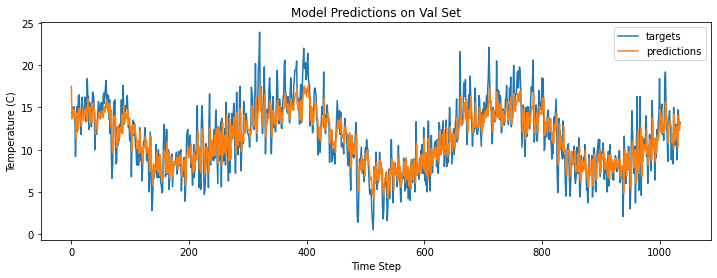

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(val_targets, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Temperature (C)')
plt.title('Model Predictions on Val Set');